In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree


# Understanding the Datasets

In [ ]:
data = pd.read_csv('/content/student_lifestyle_dataset.csv')
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
print('Null cells: ', data.isnull().sum().sum())
print("Duplicate Rows: ", data.duplicated().sum())

Null cells:  0
Duplicate Rows:  0


In [ ]:
data.shape

(2000, 8)

In [ ]:
data.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [ ]:
# examine our y variable
np.unique(data["Stress_Level"], return_counts=True)

(array(['High', 'Low', 'Moderate'], dtype=object), array([1029,  297,  674]))

In [ ]:
# columns
data.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [ ]:
# Check for any missing values (no missing values)
data.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [ ]:
data

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [ ]:
### see which variables are most closely related
# encode the categorical variable to numerical for correlation check
data['Stress_Level'] = data['Stress_Level'].map({'Low': 30, 'Moderate': 40, 'High': 50})
correlation_matrix = data.corr()
stress_correlations = correlation_matrix['Stress_Level']
print(stress_correlations)

Student_ID                         0.003306
Study_Hours_Per_Day                0.738843
Extracurricular_Hours_Per_Day     -0.006099
Sleep_Hours_Per_Day               -0.298917
Social_Hours_Per_Day              -0.054702
Physical_Activity_Hours_Per_Day   -0.205207
GPA                                0.550395
Stress_Level                       1.000000
Name: Stress_Level, dtype: float64


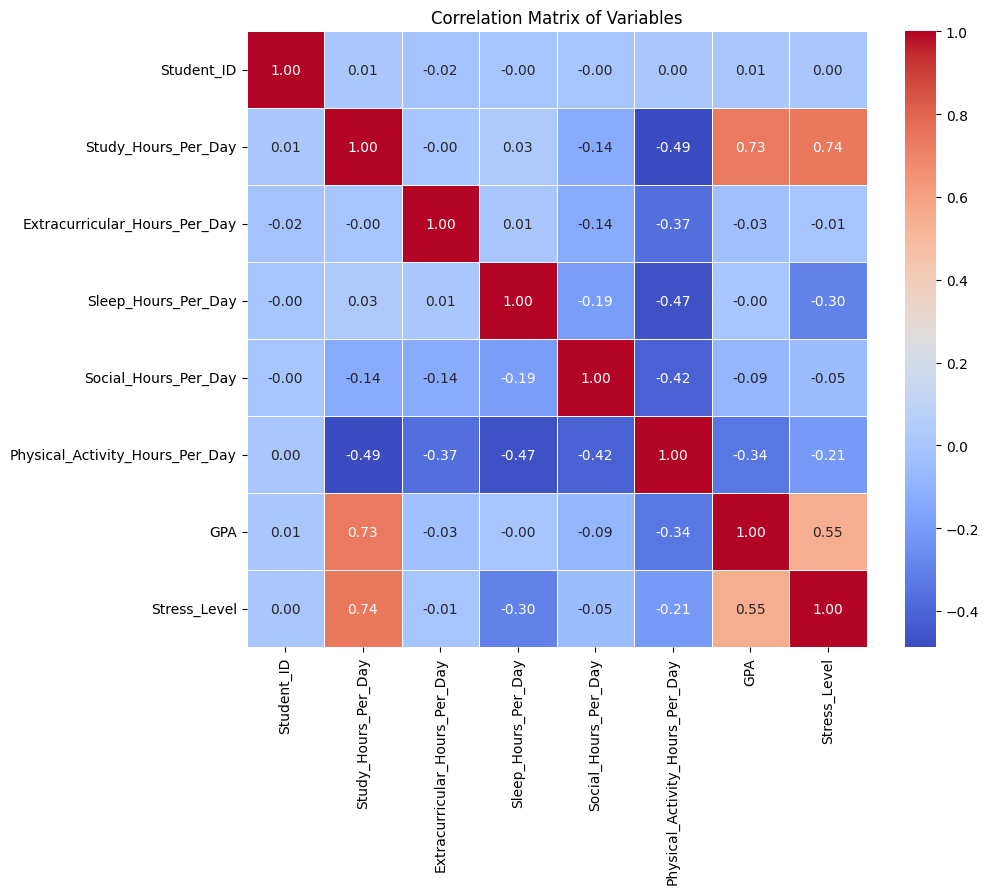

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

# Data Visualization


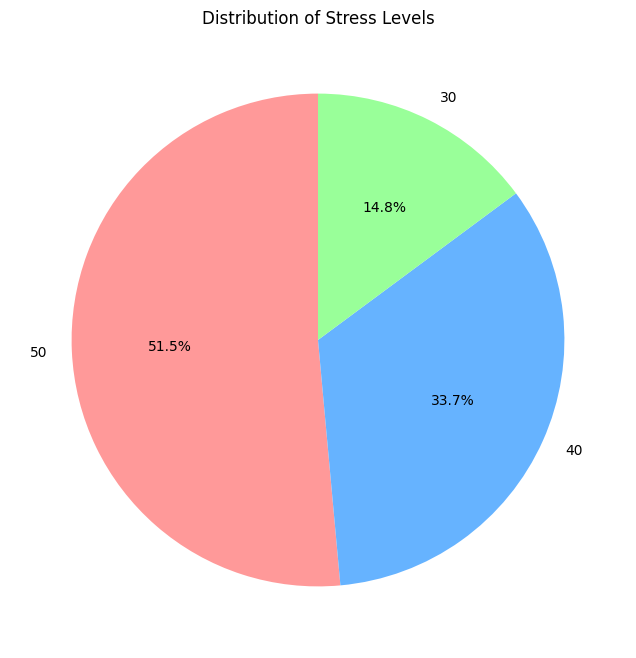

In [ ]:
# distribution of stress level
plt.figure(figsize=(8, 8))  # Makes the figure square
stress_counts = data['Stress_Level'].value_counts()
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Stress Levels')
plt.show()

ValueError: List of boxplot statistics and `positions` values must have same the length

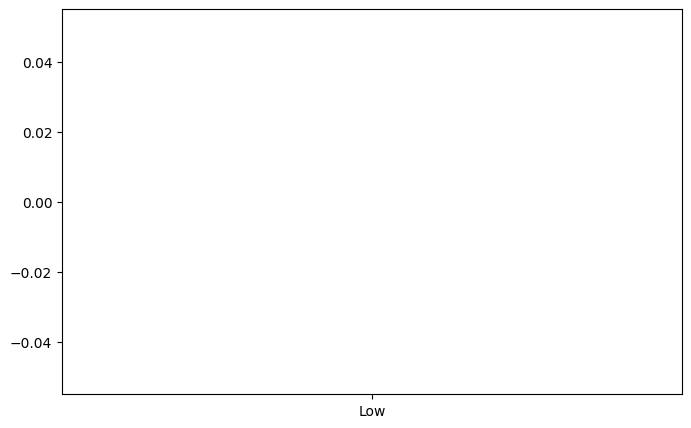

In [ ]:
# specify the order of boxplots
category_order = ['Low', 'Moderate', 'High']
# GPA vs stress_level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Stress_Level', y='GPA', data=data, order = category_order)
plt.title('Distribution of GPA Across Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

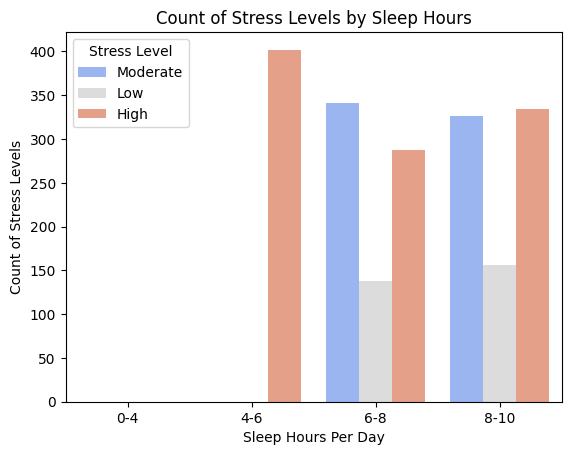

In [ ]:
stress_mapping = {30: 'Low', 40: 'Moderate', 50: 'High'}
data['Stress_Level_Label'] = data['Stress_Level'].map(stress_mapping)
bins = [0, 4, 6, 8, 10]
labels = ['0-4', '4-6', '6-8', '8-10']
data['Sleep_Hours_Binned'] = pd.cut(data['Sleep_Hours_Per_Day'], bins=bins, labels=labels, right=False)
sns.countplot(data=data, x='Sleep_Hours_Binned', hue='Stress_Level_Label', palette='coolwarm')
plt.title('Count of Stress Levels by Sleep Hours')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Count of Stress Levels')
plt.legend(title='Stress Level')

<ipython-input-32-3bde06a4c2d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Stress_Level_Label', y='Study_Hours_Per_Day', order = category_order, palette=custom_palette)


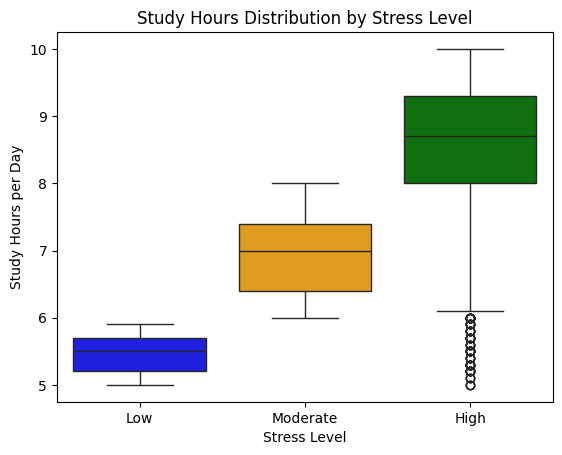

In [ ]:
stress_mapping = {30: 'Low', 40: 'Moderate', 50: 'High'}
data['Stress_Level_Label'] = data['Stress_Level'].map(stress_mapping)
category_order = ['Low', 'Moderate', 'High']
custom_palette = {'Low': 'blue', 'Moderate': 'orange', 'High': 'green'}
sns.boxplot(data=data, x='Stress_Level_Label', y='Study_Hours_Per_Day', order = category_order, palette=custom_palette)
plt.title('Study Hours Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Study Hours per Day')
plt.show()

<ipython-input-33-4a7eb087b2e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Stress_Level_Label', y='Social_Hours_Per_Day', palette='coolwarm', inner='quartile')


Text(0, 0.5, 'Sleep Hours Per Day')

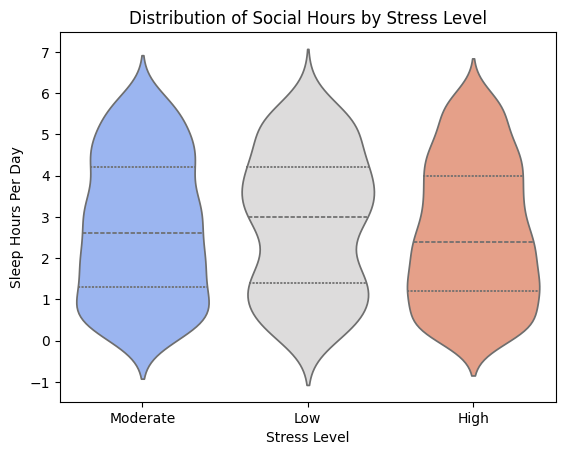

In [ ]:
stress_mapping = {30: 'Low', 40: 'Moderate', 50: 'High'}
data['Stress_Level_Label'] = data['Stress_Level'].map(stress_mapping)
category_order = ['Low', 'Moderate', 'High']
sns.violinplot(data=data, x='Stress_Level_Label', y='Social_Hours_Per_Day', palette='coolwarm', inner='quartile', order)
plt.title('Distribution of Social Hours by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours Per Day')

# Data Cleaning

In [ ]:
selected_data = data.drop(columns = ['Extracurricular_Hours_Per_Day', 'Student_ID' ])
selected_data.columns


# Model Building

## Decision tree

In [ ]:
### decision tree
# split data
X = data[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA']]  # Features
y = data['Stress_Level']  # Target variable

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
# Training the model
clf.fit(X_train, y_train)